In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys

sys.path.append("../../../data/wrangle_module.py")
# Import the DataProcessor class from the wrangle_module.py file
from wrangle_module import DataProcessor

In [ ]:
# ----------------------------------------------------------------------------------------------
# 1. Use the DataProcessor class to prepare the data
# ----------------------------------------------------------------------------------------------

# Instantiate the DataProcessor class
processor = DataProcessor()

# Use the wrangle method to process the data
df = processor.wrangle("../../data/raw/Melbourne_housing_FULL.csv")

In [ ]:
print("df shape:", df.shape)

df shape: (5969, 22)


In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Price_USD
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,776250.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1098750.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1200000.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,1407000.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1227000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5969 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5969 non-null   object 
 1   Address        5969 non-null   object 
 2   Rooms          5969 non-null   int64  
 3   Type           5969 non-null   object 
 4   Price          5969 non-null   float64
 5   Method         5969 non-null   object 
 6   SellerG        5969 non-null   object 
 7   Date           5969 non-null   object 
 8   Distance       5969 non-null   float64
 9   Postcode       5969 non-null   float64
 10  Bedroom2       5969 non-null   float64
 11  Bathroom       5969 non-null   float64
 12  Car            5819 non-null   float64
 13  Landsize       5281 non-null   float64
 14  BuildingArea   5969 non-null   float64
 15  YearBuilt      5822 non-null   float64
 16  CouncilArea    5969 non-null   object 
 17  Latitude       5966 non-null   float64
 18  Longitude   

In [ ]:
# ----------------------------------------------------------------------------------------------
# 2. Preview the data
# ----------------------------------------------------------------------------------------------

# check the proportion of missing values
df.isnull().mean().sort_values(ascending=False)

Landsize         0.115262
Car              0.025130
YearBuilt        0.024627
Longitude        0.000503
Latitude         0.000503
Suburb           0.000000
Address          0.000000
Propertycount    0.000000
Regionname       0.000000
CouncilArea      0.000000
BuildingArea     0.000000
Bathroom         0.000000
Bedroom2         0.000000
Postcode         0.000000
Distance         0.000000
Date             0.000000
SellerG          0.000000
Method           0.000000
Price            0.000000
Type             0.000000
Rooms            0.000000
Price_USD        0.000000
dtype: float64

In [ ]:
# check the percentage of missing values
df.isnull().mean().sort_values(ascending=False) * 100

Landsize         11.526219
Car               2.512984
YearBuilt         2.462724
Longitude         0.050260
Latitude          0.050260
Suburb            0.000000
Address           0.000000
Propertycount     0.000000
Regionname        0.000000
CouncilArea       0.000000
BuildingArea      0.000000
Bathroom          0.000000
Bedroom2          0.000000
Postcode          0.000000
Distance          0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Price_USD         0.000000
dtype: float64

In [ ]:
# ----------------------------------------------------------------------------------------------

# Explore the Latitude and Longitude columns
df[["Latitude", "Longitude"]].describe()

,Latitude,Longitude
count,5966.000000,5966.000000
mean,-37.795410,144.983252
std,0.101093,0.139444
min,-38.185600,144.423790
25%,-37.852675,144.898585
50%,-37.785600,144.990755
75%,-37.733232,145.073637
max,-37.407200,145.526350


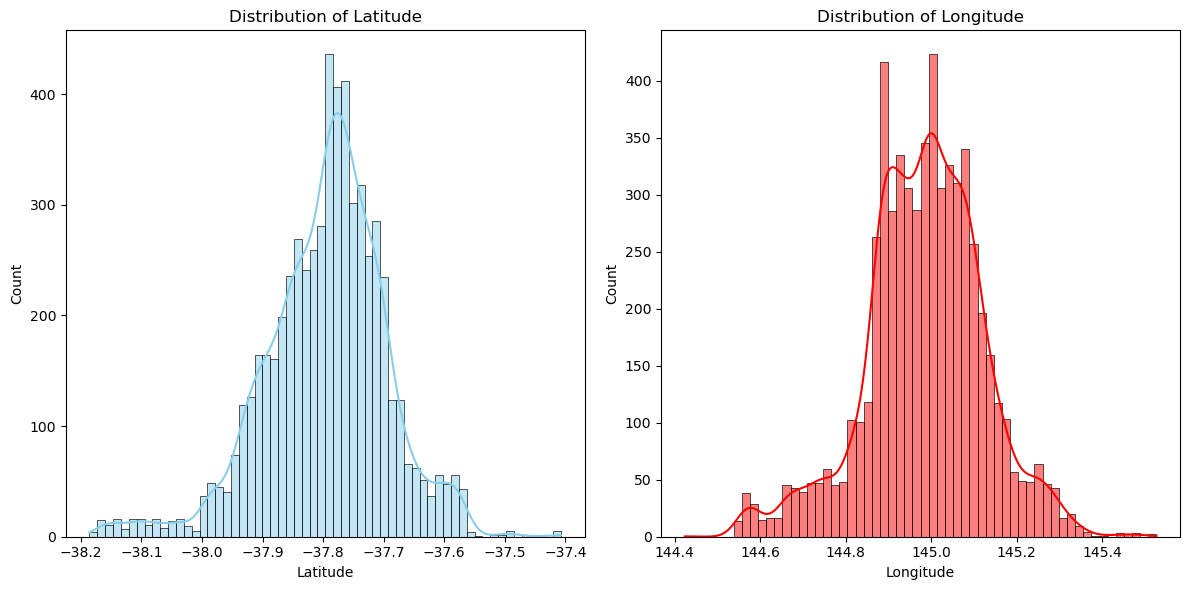

In [ ]:
# Plot the distribution of Latitude and Longitude
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["Latitude"], kde=True, color="skyblue")
plt.title("Distribution of Latitude")
plt.subplot(1, 2, 2)
sns.histplot(df["Longitude"], kde=True, color="red")
plt.title("Distribution of Longitude")
plt.tight_layout()
plt.show();

In [ ]:
# ----------------------------------------------------------------------------------------------

# Build mapbox scatter plot
fig = px.scatter_mapbox(
    df,  # The DataFrame
    lat="Latitude",  # Latitude
    lon="Longitude",  # Longitude
    width=600,  # Width of map
    height=600,  # Height of map
    color="Price_USD",
    hover_data=["Price_USD"],  # Display price when hovering mouse over house
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
"""
Key Insights:
The most expensive properties are concentrated in the central and northeast
inner suburbs, marked by yellow and orange hues, suggesting values often
exceeding $1 million.

This trend suggests a common urban phenomenon where proximity to the city 
center correlates with higher real estate values, often attributed to
accessibility, amenities, and demand.
"""

'\nKey Insights:\nThe most expensive properties are concentrated in the central and northeast\ninner suburbs, marked by yellow and orange hues, suggesting values often\nexceeding $1 million.\n\nThis trend suggests a common urban phenomenon where proximity to the city \ncenter correlates with higher real estate values, often attributed to\naccessibility, amenities, and demand.\n'

In [ ]:
# Add a third dimension to the scatter plot
# 3D scatter plot
fig = px.scatter_3d(
    df,
    x="Longitude",
    y="Latitude",
    z="Price_USD",
    labels={"lon": "longitude", "lat": "latitude", "price_usd": "price"},
    width=600,
    height=500,
)
# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)
# Display figure
fig.show();

In [ ]:
# ----------------------------------------------------------------------------------------------
# 3. Export the location wrangled data
# ----------------------------------------------------------------------------------------------

df.to_csv(
    "../../data/processed/processed_melbourne_data.csv", index=False
          )